In [43]:
"""
graph and analyse the results from active learning experiments to evaluate selection strategies.

author: eoghan cunningham
"""

'\ngraph and analyse the results from active learning experiments to evaluate selection strategies.\n\nauthor: eoghan cunningham\n'

In [5]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [39]:
df = pd.read_csv('selection_strategy_eval.csv')
# average scores across all experiments
BASs = [col for col in df.columns if 'BAS' in col]
df['mean_BAS'] = df[BASs].mean(axis = 1)

# rearrange the colours - for consistency
strategies = df.sampling.unique()
(strategies[0],strategies[-2]) = (strategies[-2],strategies[0])
(strategies[1],strategies[-1]) = (strategies[-1],strategies[1])
palette = dict(zip(strategies, sns.color_palette()))

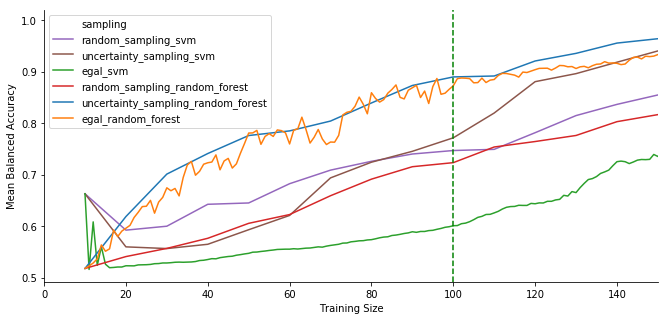

In [40]:
# plot learning curves
plt.figure(figsize = (11,5))
plot = sns.lineplot(x = 'size', y = 'mean_BAS', hue = 'sampling', data = df, palette = palette)
plot.axvline(100, 0, 1, linestyle = '--', color ='g')
plot.set_xlim([0,150])
plot.set(ylabel = 'Mean Balanced Accuracy',xlabel = 'Training Size')
sns.despine()

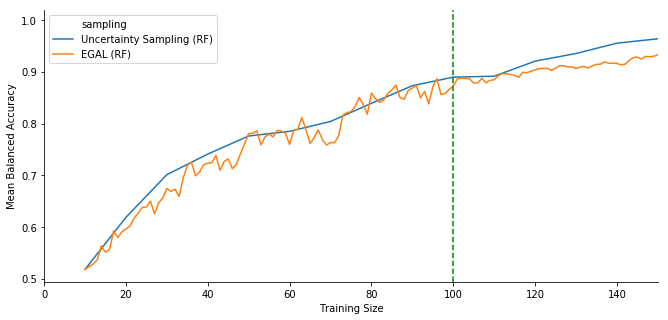

In [42]:
# reduce table to last two strategies
df = df.iloc[-480:]
# correct names
df['sampling'] = df['sampling'].replace(['uncertainty_sampling_random_forest','egal_random_forest'],
                                        ['Uncertainty Sampling (RF)','EGAL (RF)'])
# plot learning curves
plt.figure(figsize = (11,5))
plot = sns.lineplot(x = 'size', y = 'mean_BAS', hue = 'sampling', data = df)
plot.axvline(100, 0, 1, linestyle = '--', color ='g')
plot.set_xlim([0,150])
plot.set(ylabel = 'Mean Balanced Accuracy',xlabel = 'Training Size')
sns.despine()

In [15]:
# calculate AUC for each learning curve 
training_lim = 100 - 9
rows = []
for sampling in df.sampling.unique():
    df_t = df[df.sampling == sampling].iloc[:training_lim].dropna()
    row = {'sampling' : sampling, 'auc' : auc(df_t['size'],df_t['mean_BAS'])}
    rows.append(row)
auc_df = pd.DataFrame(rows)[['sampling','auc']]
# print latex table
print(auc_df.to_latex(index = False, float_format = "%.2f" ))
auc_df

\begin{tabular}{lr}
\toprule
                           sampling &   auc \\
\midrule
                random\_sampling\_svm & 60.41 \\
           uncertainty\_sampling\_svm & 57.75 \\
                           egal\_svm & 49.92 \\
      random\_sampling\_random\_forest & 55.88 \\
 uncertainty\_sampling\_random\_forest & 68.41 \\
                 egal\_random\_forest & 67.09 \\
\bottomrule
\end{tabular}



,sampling,auc
0,random_sampling_svm,60.412950
1,uncertainty_sampling_svm,57.750101
2,egal_svm,49.920536
3,random_sampling_random_forest,55.882034
4,uncertainty_sampling_random_forest,68.413084
5,egal_random_forest,67.091707


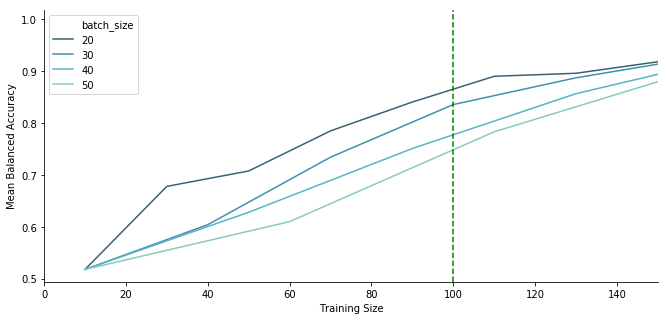

In [16]:
# load results of uncertainty sampling by batch size
df = pd.read_csv('uncertainty_sampling_batch_size.csv')
# average across experiments 
BASs = [col for col in df.columns if 'BAS' in col]
df['mean_BAS'] = df[BASs].mean(axis = 1)
# plot learning curves 
plt.figure(figsize = (11,5))
plot = sns.lineplot(x = 'size', y = 'mean_BAS', hue = 'batch_size', data = df, palette = sns.color_palette('GnBu_d',4))
plot.axvline(100, 0, 1, linestyle = '--', color ='g')
plot.set_xlim([0,150])
plot.set(ylabel = 'Mean Balanced Accuracy',xlabel = 'Training Size')
sns.despine()